In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import requests
from bs4 import BeautifulSoup

import re

## List of Historical United States Senators

In [2]:
# URL from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_former_United_States_senators'

# Pull the data from the webpage
response = requests.get(url)

# Load the response into soup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the wikitables
data=soup.find_all('table',{'class':"wikitable"})

# Replace any page breaks with commas for easier processing
df=pd.read_html(str(data).replace("<br/>", ","))

# Build the dataframe
df=pd.DataFrame(df[1])

# Clean the data
df = df[~df['Years'].str.contains('edit')]
df = df[~df['Years'].str.contains('Years')]
df.drop(['Class[2]'], axis =1, inplace=True)

df.head()

,Senator,Years,State,Party,Lifespan
1,Joseph Carter Abbott,1868–1872,North Carolina,Republican,1825–1881
2,James Abdnor,1981–1987,South Dakota,Republican,1923–2012
3,Hazel Abel,1954,Nebraska,Republican,1888–1966
4,James Abourezk,1973–1979,South Dakota,Democratic,1931–
5,Spencer Abraham,1995–2001,Michigan,Republican,1952–


In [3]:
df.sort_values('Years')

,Senator,Years,State,Party,Lifespan
1365,William Paterson,1789–1790,New Jersey,Federalist,1745–1806
731,William Grayson,1789–1790,Virginia,Democratic-Republican,1740–1790
571,Jonathan Elmer,1789–1791,New Jersey,Federalist,1745–1817
1118,William Maclay,1789–1791,Pennsylvania,Democratic-Republican,1737–1804
956,William S. Johnson,1789–1791,Connecticut,Federalist,1727–1819
...,...,...,...,...,...
1681,Luther Strange,2017–2018,Alabama,Republican,1953–
790,Kamala Harris,2017–2021,California,Democratic,1964–
967,Doug Jones,2018–2021,Alabama,Democratic,1954–
1207,Martha McSally,2019–2020,Arizona,Republican,1966–


In [4]:
df2 = []

for ind, row in df.iterrows():
    # One of the entries doesn't have a -, so we need to clean it 
    if len(row['Years']) == 8:
        row['Years'] = f"{row['Years'][0:4]}–{row['Years'][4:8]}"
        
    # Factoring in non-consecutive terms 
    for party, yrs in zip(row['Party'].split(','), row['Years'].split(",")):
        row['Served'] = yrs
        row['Party'] = party
        
        df2.append(dict(row))

df2 = pd.DataFrame(df2)
df2.tail(10)

,Senator,Years,State,Party,Lifespan,Served
2065,William Wright,"1853–1859,1863–1866",New Jersey,Democratic,1794–1866,1853–1859
2066,Louis C. Wyman,1974–1975,New Hampshire,Republican,1917–2002,1974–1975
2067,Ralph W. Yarborough,1957–1971,Texas,Democratic,1903–1996,1957–1971
2068,Richard Yates,1865–1871,Illinois,Republican,1815–1873,1865–1871
2069,Lafayette Young,1910–1911,Iowa,Republican,1848–1926,1910–1911
2070,Milton R. Young,1945–1981,North Dakota,Republican,1897–1983,1945–1981
2071,Richard M. Young,1837–1843,Illinois,Democratic,1798–1861,1837–1843
2072,Stephen M. Young,1959–1971,Ohio,Democratic,1889–1984,1959–1971
2073,David Levy Yulee,"1845–1851,1855–1861",Florida,Democratic,1810–1886,1845–1851
2074,Edward Zorinsky,1976–1987,Nebraska,Democratic,1928–1987,1976–1987


In [5]:
df2 = df2.sort_values('Served')

In [6]:
df2['Party'].value_counts()

Democratic                871
Republican                711
Democratic-Republican     171
Whig                       95
Federalist                 93
National Republican        60
Liberal Republican         10
Free Soiler                 8
Silver Republican           7
American                    6
Populist                    6
Unionist                    6
Independent                 5
Nullifier                   4
Farmer-Laborite             4
Oppositionist               3
Progressive                 3
Independent Democrat        2
Unconditional Unionist      2
Readjuster                  2
Liberty                     1
Anti-Monopolist             1
Law and Order               1
Silverite                   1
Conservative                1
Independence                1
Name: Party, dtype: int64

In [7]:
df2

,Senator,Years,State,Party,Lifespan,Served
779,William Grayson,1789–1790,Virginia,Democratic-Republican,1740–1790,1789–1790
1443,William Paterson,1789–1790,New Jersey,Federalist,1745–1806,1789–1790
608,Jonathan Elmer,1789–1791,New Jersey,Federalist,1745–1817,1789–1791
869,Benjamin Hawkins,"1789–1791,1791–1795",North Carolina,Federalist,1754–1816,1789–1791
1190,William Maclay,1789–1791,Pennsylvania,Democratic-Republican,1737–1804,1789–1791
...,...,...,...,...,...,...
1784,Luther Strange,2017–2018,Alabama,Republican,1953–,2017–2018
847,Kamala Harris,2017–2021,California,Democratic,1964–,2017–2021
1034,Doug Jones,2018–2021,Alabama,Democratic,1954–,2018–2021
1284,Martha McSally,2019–2020,Arizona,Republican,1966–,2019–2020


In [8]:
df2['Start'] = df2['Served'].str.split("–").str[0]
df2['End'] = df2['Served'].str.split("–").str[-1]
df2['Birth_Year'] = df2['Lifespan'].str.split("–").str[0].str.split("/").str[0].astype(int)

df2['Start'] = df2['Start'].astype(int)
df2['End'] = df2['End'].astype(int)

In [9]:
df2.head()

,Senator,Years,State,Party,Lifespan,Served,Start,End,Birth_Year
779,William Grayson,1789–1790,Virginia,Democratic-Republican,1740–1790,1789–1790,1789,1790,1740
1443,William Paterson,1789–1790,New Jersey,Federalist,1745–1806,1789–1790,1789,1790,1745
608,Jonathan Elmer,1789–1791,New Jersey,Federalist,1745–1817,1789–1791,1789,1791,1745
869,Benjamin Hawkins,"1789–1791,1791–1795",North Carolina,Federalist,1754–1816,1789–1791,1789,1791,1754
1190,William Maclay,1789–1791,Pennsylvania,Democratic-Republican,1737–1804,1789–1791,1789,1791,1737


In [10]:
df2[df2['Senator'] == 'John P. Hale']

,Senator,Years,State,Party,Lifespan,Served,Start,End,Birth_Year
811,John P. Hale,"1847–1848,1848–1853,1855–1856,1856–1865",New Hampshire,Independent Democrat,1806–1873,1847–1848,1847,1848,1806
812,John P. Hale,"1847–1848,1848–1853,1855–1856,1856–1865",New Hampshire,Free Soiler,1806–1873,1848–1853,1848,1853,1806
813,John P. Hale,"1847–1848,1848–1853,1855–1856,1856–1865",New Hampshire,Free Soiler,1806–1873,1855–1856,1855,1856,1806
814,John P. Hale,"1847–1848,1848–1853,1855–1856,1856–1865",New Hampshire,Republican,1806–1873,1856–1865,1856,1865,1806


In [11]:
df2.sort_values('Start')

,Senator,Years,State,Party,Lifespan,Served,Start,End,Birth_Year
779,William Grayson,1789–1790,Virginia,Democratic-Republican,1740–1790,1789–1790,1789,1790,1740
905,John Henry,1789–1797,Maryland,Federalist,1750–1798,1789–1797,1789,1797,1750
800,James Gunn,"1789–1797,1797–1801",Georgia,Democratic-Republican,1753–1801,1789–1797,1789,1797,1753
1786,Caleb Strong,1789–1796,Massachusetts,Federalist,1745–1819,1789–1796,1789,1796,1745
1084,Rufus King,"1789–1796,1813–1825",New York,Federalist,1755–1827,1789–1796,1789,1796,1755
...,...,...,...,...,...,...,...,...,...
847,Kamala Harris,2017–2021,California,Democratic,1964–,2017–2021,2017,2021,1964
1784,Luther Strange,2017–2018,Alabama,Republican,1953–,2017–2018,2017,2018,1953
1034,Doug Jones,2018–2021,Alabama,Democratic,1954–,2018–2021,2018,2021,1954
1284,Martha McSally,2019–2020,Arizona,Republican,1966–,2019–2020,2019,2020,1966


In [12]:
dict_list = []

for year in range(min(df2['Start']), 
                  max(df2['Start']) + 1):
    tmp = df2[(df2['Start'] <= year) & (df2['End'] >= year)]
    for ind, row in tmp.iterrows():
        if row['Senator'] == "John Edwards" and row['Start'] > 1990:
            row['Senator'] = "John Edwards (1999)"
        
        sen_dict = {"Year":year, 
                    "Senator":row['Senator'], 
                    "State":row["State"], 
                    "Party":row['Party'], 
                    "Age": year-row['Birth_Year']}
        dict_list.append(sen_dict)
    

In [13]:
senators = pd.DataFrame(dict_list)

In [14]:
senators[senators["Year"] == 1789].head(10)

,Year,Senator,State,Party,Age
0,1789,William Grayson,Virginia,Democratic-Republican,49
1,1789,William Paterson,New Jersey,Federalist,44
2,1789,Jonathan Elmer,New Jersey,Federalist,44
3,1789,Benjamin Hawkins,North Carolina,Federalist,35
4,1789,William Maclay,Pennsylvania,Democratic-Republican,52
5,1789,William S. Johnson,Connecticut,Federalist,62
6,1789,Philip Schuyler,New York,Federalist,56
7,1789,Tristram Dalton,Massachusetts,Federalist,51
8,1789,Charles Carroll of Carrollton,Maryland,Federalist,52
9,1789,Richard Henry Lee,Virginia,Democratic-Republican,57


In [15]:
senators[senators["Senator"] == "Ted Kennedy"].head(10)

,Year,Senator,State,Party,Age
13038,1962,Ted Kennedy,Massachusetts,Democratic,30
13136,1963,Ted Kennedy,Massachusetts,Democratic,31
13234,1964,Ted Kennedy,Massachusetts,Democratic,32
13334,1965,Ted Kennedy,Massachusetts,Democratic,33
13432,1966,Ted Kennedy,Massachusetts,Democratic,34
13531,1967,Ted Kennedy,Massachusetts,Democratic,35
13630,1968,Ted Kennedy,Massachusetts,Democratic,36
13728,1969,Ted Kennedy,Massachusetts,Democratic,37
13826,1970,Ted Kennedy,Massachusetts,Democratic,38
13924,1971,Ted Kennedy,Massachusetts,Democratic,39


In [16]:
senators[senators["Year"] == 1992].head(10)

,Year,Senator,State,Party,Age
16007,1992,Robert C. Byrd,West Virginia,Democratic,75
16008,1992,Quentin N. Burdick,North Dakota,Democratic,84
16009,1992,Claiborne Pell,Rhode Island,Democratic,74
16010,1992,Ted Kennedy,Massachusetts,Democratic,60
16011,1992,Daniel Inouye,Hawaii,Democratic,68
16012,1992,Strom Thurmond,South Carolina,Republican,90
16013,1992,Fritz Hollings,South Carolina,Democratic,70
16014,1992,Mark Hatfield,Oregon,Republican,70
16015,1992,Ted Stevens,Alaska,Republican,69
16016,1992,Alan Cranston,California,Democratic,78


## List of Current United States Senators

In [17]:
url = 'https://en.wikipedia.org/wiki/List_of_current_United_States_senators'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

data=soup.find_all('table',{'class':"wikitable"})

df=pd.read_html(str(data))

df=pd.DataFrame(df[4])
df.head()

,State,Portrait,Senator,Party,Party.1,Born,Occupation(s),Previous electiveoffice(s),Education,Assumed office,Term up,Residence
0,Alabama,NaN,Richard Shelby,NaN,Republican[d],(age 87),Lawyer,U.S. HouseAlabama Senate,"University of Alabama (BA, LLB) Birmingham Sch...","January 3, 1987",2022,Tuscaloosa[2]
1,Alabama,NaN,Tommy Tuberville,NaN,Republican,(age 67),"College football coachPartner, investment mana...",None,Southern Arkansas University (BS),"January 3, 2021",2026,Auburn
2,Alaska,NaN,Lisa Murkowski,NaN,Republican,(age 64),Lawyer,Alaska House of Representatives,Georgetown University (AB) Willamette Universi...,"December 20, 2002[e]",2022,Girdwood[3]
3,Alaska,NaN,Dan Sullivan,NaN,Republican,(age 57),U.S. Marine Corps officerLawyerAssistant Secre...,Alaska Attorney General,Harvard University (AB) Georgetown University ...,"January 3, 2015",2026,Anchorage[4]
4,Arizona,NaN,Kyrsten Sinema,NaN,Democratic,(age 45),Social workerPolitical activistLawyerCollege l...,U.S. HouseArizona SenateArizona House of Repre...,Brigham Young University (BA) Arizona State Un...,"January 3, 2019",2024,Phoenix[5]


In [18]:
df['Start'] = df['Assumed office'].str.split(",").str[-1].str.split("[").str[0].astype(int)
df['Year_Born'] = datetime.datetime.now().year + 1 - df['Born'].str.split("age").str[-1].str[1:3].astype(int)
df['Party.1'] = df['Party.1'].str.split("[").str[0]
df.head()

,State,Portrait,Senator,Party,Party.1,Born,Occupation(s),Previous electiveoffice(s),Education,Assumed office,Term up,Residence,Start,Year_Born
0,Alabama,NaN,Richard Shelby,NaN,Republican,(age 87),Lawyer,U.S. HouseAlabama Senate,"University of Alabama (BA, LLB) Birmingham Sch...","January 3, 1987",2022,Tuscaloosa[2],1987,1935
1,Alabama,NaN,Tommy Tuberville,NaN,Republican,(age 67),"College football coachPartner, investment mana...",None,Southern Arkansas University (BS),"January 3, 2021",2026,Auburn,2021,1955
2,Alaska,NaN,Lisa Murkowski,NaN,Republican,(age 64),Lawyer,Alaska House of Representatives,Georgetown University (AB) Willamette Universi...,"December 20, 2002[e]",2022,Girdwood[3],2002,1958
3,Alaska,NaN,Dan Sullivan,NaN,Republican,(age 57),U.S. Marine Corps officerLawyerAssistant Secre...,Alaska Attorney General,Harvard University (AB) Georgetown University ...,"January 3, 2015",2026,Anchorage[4],2015,1965
4,Arizona,NaN,Kyrsten Sinema,NaN,Democratic,(age 45),Social workerPolitical activistLawyerCollege l...,U.S. HouseArizona SenateArizona House of Repre...,Brigham Young University (BA) Arizona State Un...,"January 3, 2019",2024,Phoenix[5],2019,1977


In [19]:
dict_list = []

for year in range(min(senators['Year']), 
                  max(senators['Year']) + 1):
    
    tmp = df[(df['Start'] <= year)]
    for ind, row in tmp.iterrows():
        sen_dict = {"Year":year, 
                    "Senator":row['Senator'], 
                    "State":row["State"], 
                    "Party":row['Party.1'], 
                    "Age": year-row['Year_Born']}
        dict_list.append(sen_dict)
    

In [20]:
pd.DataFrame(dict_list)

,Year,Senator,State,Party,Age
0,1975,Patrick Leahy,Vermont,Democratic,34
1,1976,Patrick Leahy,Vermont,Democratic,35
2,1977,Patrick Leahy,Vermont,Democratic,36
3,1978,Patrick Leahy,Vermont,Democratic,37
4,1979,Patrick Leahy,Vermont,Democratic,38
...,...,...,...,...,...
1087,2020,Joe Manchin,West Virginia,Democratic,72
1088,2020,Shelley Moore Capito,West Virginia,Republican,66
1089,2020,Ron Johnson,Wisconsin,Republican,64
1090,2020,Tammy Baldwin,Wisconsin,Democratic,57


In [21]:
senators = pd.concat([senators, pd.DataFrame(dict_list)], ignore_index=True)

In [22]:
senators.sample(20)

,Year,Senator,State,Party,Age
16635,1998,Connie Mack III,Florida,Republican,58
557,1804,John Smith,Ohio,Democratic-Republican,69
4741,1875,Samuel J. R. McMillan,Minnesota,Republican,49
8466,1917,John K. Shields,Tennessee,Democratic,59
5465,1885,John P. Jones,Nevada,Republican,56
17117,2003,Dean Barkley,Minnesota,Independence,53
14368,1975,Jesse Helms,North Carolina,Republican,54
1290,1822,Horatio Seymour,Vermont,Democratic-Republican,44
10813,1940,Berkeley L. Bunker,Nevada,Democratic,34
16494,1997,Daniel Inouye,Hawaii,Democratic,73


In [23]:
senators['Party'].value_counts()

Democratic                8854
Republican                7601
Democratic-Republican      886
Whig                       543
Federalist                 492
National Republican        331
Independent                 62
Populist                    44
Silver Republican           35
Liberal Republican          30
Free Soiler                 30
Farmer-Laborite             28
American                    28
Progressive                 19
Unionist                    18
Nullifier                   16
Readjuster                  14
Independent Democrat        10
Unconditional Unionist       8
Anti-Monopolist              7
Oppositionist                7
Silverite                    7
Conservative                 6
Liberty                      2
Law and Order                2
Independence                 2
Name: Party, dtype: int64

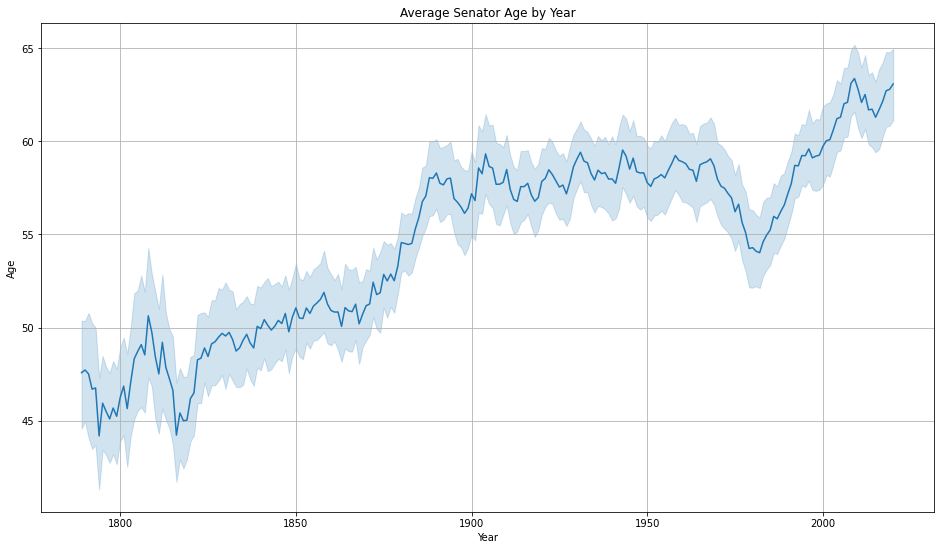

In [25]:
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x = senators['Year'], y = senators['Age'])
plt.title("Average Senator Age by Year");
plt.grid()
plt.show()

In [28]:
senators.to_csv("senators.csv", index=False)